In [1]:
import matplotlib.pyplot as plt
import numpy as np
'''
$7,000 for each 48-port GigE switch at the edge
and $700,000 for 128-port 10 GigE switches in the aggregation and
core layers.
'''

'\n$7,000 for each 48-port GigE switch at the edge\nand $700,000 for 128-port 10 GigE switches in the aggregation and\ncore layers.\n'

In [2]:
edge_switch_cost = 7000
switch_128_cost = 700000


In [76]:
k = np.array([4,8,12,16,20,24,32,48])
fat_tree_hosts = (np.power(k,3))//4

core_switches = np.power(k/2,2)
aggregate_switches = np.power(k,2)/2
edge_switches = np.power(k,2)/2

print(fat_tree_hosts)
print(core_switches*7000)
print((core_switches+aggregate_switches)*7000)

#NOTE: 3000 seems to be a better price for replication than 7000. Why?
cost = 3000* (core_switches + (edge_switches+aggregate_switches))

print(cost)

[   16   128   432  1024  2000  3456  8192 27648]
[  28000.  112000.  252000.  448000.  700000. 1008000. 1792000. 4032000.]
[   84000.   336000.   756000.  1344000.  2100000.  3024000.  5376000.
 12096000.]
[  60000.  240000.  540000.  960000. 1500000. 2160000. 3840000. 8640000.]


In [89]:
#Three tier design
#Edge - 48 port, 4 10G uplinks
#128 port
def tree_topo(ratio, num_hosts):
    bandwidth = num_hosts/ratio
    edge = bandwidth/40
    aggregate = edge/(128/8)
    core = aggregate/2
    return core, aggregate, edge

#tree_hosts = np.array([20000])
tree_hosts = np.array([0,100,300,600,1100,2000,5000,10000,15000,20000])
def oversubscription(r):
    arr = []
    for hosts in tree_hosts:
        core, aggregate, edge = tree_topo(r,hosts)
        print(core, aggregate, edge)
        total = (core + aggregate)*switch_128_cost + edge_switch_cost * edge
        arr.append(total/1000000)
    return np.array(arr)

one_to_one = oversubscription(1)

0.0 0.0 0.0
0.078125 0.15625 2.5
0.234375 0.46875 7.5
0.46875 0.9375 15.0
0.859375 1.71875 27.5
1.5625 3.125 50.0
3.90625 7.8125 125.0
7.8125 15.625 250.0
11.71875 23.4375 375.0
15.625 31.25 500.0


[ 0.     1.421  1.449  1.491  2.261  3.794  7.735 14.763 22.491 30.219]
[ 0.     1.421  1.449  1.491  2.261  3.794  7.035 14.063 20.391 27.419]


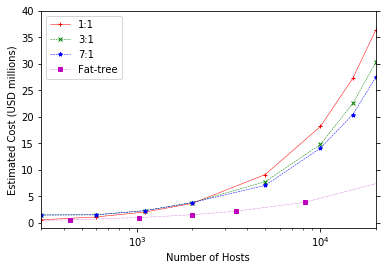

In [101]:
def tree_topo(r,num_hosts):
    edge = np.ceil(num_hosts/48)
    #print(num_hosts/(r*10))
    core = np.ceil(num_hosts/(r*10*128))
    aggregate = np.ceil((num_hosts*2)/(10*(128-core)))
    return core, aggregate, edge

def total_cost(r):
    arr = []
    for hosts in tree_hosts:
        core, aggregate, edge = tree_topo(r,hosts)
        #print(core, aggregate, edge)
        total = (core + aggregate)*switch_128_cost + edge_switch_cost * edge
        arr.append(total/1000000)
    return np.array(arr)

# one_to_one = total_cost(1)
# print(one_to_one)
three_to_one = total_cost(3)
print(three_to_one)
seven_to_one = total_cost(7)
print(seven_to_one)

plt.xscale('log')
plt.xlim(300, 20000)
plt.ylim(-1, 40)
plt.tick_params(right=True)
plt.plot(tree_hosts, one_to_one, 'r+',linestyle='solid',linewidth=0.5, markersize=4,label='1:1')
plt.plot(tree_hosts, three_to_one, 'gx',linestyle='dashed',linewidth=0.5, markersize=4,label='3:1')
plt.plot(tree_hosts, seven_to_one, 'b*',linestyle='dashed',linewidth=0.5, markersize=4,label='7:1')
plt.plot(fat_tree_hosts, cost/1000000, 'ms',linestyle='dotted',linewidth=0.5, markersize=4,label='Fat-tree')
plt.xlabel('Number of Hosts')
plt.ylabel('Estimated Cost (USD millions)')
plt.legend()